# DATA 601 - GROUP 4: Air Quality across Countries in COVID-19

Air pollution is a major environmental issue that can have a significant impact on human health. [cite]. It is caused by a variety of pollutants, including particulate matter (PM2.5 and PM10), nitrogen dioxide (NO2), sulphur dioxide (SO2), carbon monoxide (CO), and ozone (O3). [cite] These pollutants are monitored by government agencies using the air quality index (AQI), which communicates the level of air pollution to the public. Exposure to high levels of air pollution can lead to respiratory and cardiovascular diseases, headaches, and eye irritation. 
The focus of this project is to demonstrate the effect of air quality on health, particularly in relation to COVID-19. We aim to raise awareness about the effects of air pollution and key pollutants affecting the AQI by analyzing the AQI across seven major countries, including Brazil, India, Italy, France, the United States, Canada, and China, during the COVID-19 pandemic (2019-Q4 to 2022-Q4). The aim of this study is to examine whether there was a trend in AQI affecting the number of COVID-19 cases in each country, which can contribute to a better understanding of the relationship between human activities and air pollution.


### 4 KEY GUIDING QUESTIONS
1.	How is AQI distributed across different countries during COVID (2019-Q4 to 2022-Q4)?
2.	Which countries experienced a rise in AQI during the sampled duration, and which country and city had the highest level of pollution?
3.	What factors influenced AQI, and what is the correlation between different pollutants and AQI?
4.	Was there a relationship between AQI and COVID-19 cases in each country during the pandemic?


### 1.	DATA COLLECTION:
The data for this project were collected from two sources. The first source was the Air Quality Open Data Platform [https://aqicn.org/data-platform/covid19/], which provided AQI data for the period from 2019-Q4 to 2022-Q4 in nine CSV files. The dataset provides average (median) values for each major city based on data from several stations, including air pollutant species such as PM2.5, PM10, and ozone, as well as meteorological data such as wind and temperature. All air pollutant species are converted to the US EPA standard, and all dates are UTC-based [https://www.epa.gov]. The second source is Kaggle, where COVID-19 data were collected from the World Health Organization's website, specifically the daily total cases, daily new cases, active cases, daily total deaths, and daily new deaths for each country [https://www.kaggle.com/datasets/josephassaker/covid19-global-dataset]. 


In [1]:
import seaborn as sns
import pycountry
import matplotlib.pyplot as plt
import plotly.express as px
from urllib.request import urlopen
px_template = "simple_white"
import json
from geopy.geocoders import Nominatim  
import time
from datetime import datetime as dt   
from geopy.geocoders import Nominatim
#import missingno as msno
import numpy as np # linear algebra
import pandas as pd 
import matplotlib.animation as animation
import plotly.graph_objs as go
import folium
from matplotlib import cm
from matplotlib.lines import Line2D
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import ipywidgets as widgets
from ipywidgets import interact
import plotly.io as pio

## DATA PREPROCESSING #1
***


##### Data Source: World Air Quality data from 08-2019 to 12-2021
***
This dataset tracks COVID-19 case data as provided by individual Canadian provincial websites. The data is structured in tabular .csv format and is updated daily (5pm MT). Data columns include no. of tests, cases, recoveries, and deaths by province per day. (Public Health Infobase 2020). Contains information licenced under the open government licence - Canada

With the COVID-19 spreading out all over the world, the World Air Quality Index project team saw a surge in requests for global data covering the whole world map. As a result, the WAQI project is now providing a new dedicated data-set, updated 3 times a day, and covering about 380 major cities in the world, from January 2015 until now.

This dataset provides AQI data for each major cities is based on the average (median) of several stations. Data columns include Date, Country, City, Specie, count, min, max, median and standard deviation for each of the air pollutant species: Particulate Matter 2.5mm (PM2.5), Particulate Matter 10mm (PM10), Ozone(O3), Carbon Monoxide(CO), Nitrogen Oxides (NO2), Sulfur Dioxide (SO2). 

- https://aqicn.org/data-platform/covid19/

#### Part 1 (DATA WRANGLING)

- Import Data - Data on AQI and COVID-19
- Merge Data imported in different files
- Find missing values - Replaced NaN values of particular columns 
- Drop columns that are not needed for analysis
- Handle Date datatype and creating Year, Month, Day frames for data manipulations


In [2]:
df_2019= pd.read_csv('/Users/monicachandramurthy/Desktop/WAQI/waqi-covid19-airqualitydata-2019Q4.csv', parse_dates=['Date'])
df_2020_1= pd.read_csv('/Users/monicachandramurthy/Desktop/WAQI/waqi-covid19-airqualitydata-2019Q4.csv', parse_dates=['Date'])
df_2020_2= pd.read_csv('/Users/monicachandramurthy/Desktop/WAQI/waqi-covid19-airqualitydata-2020Q2.csv', parse_dates=['Date'])
df_2020_3= pd.read_csv('/Users/monicachandramurthy/Desktop/WAQI/waqi-covid19-airqualitydata-2020Q3.csv', parse_dates=['Date'])
df_2020_4= pd.read_csv('/Users/monicachandramurthy/Desktop/WAQI/waqi-covid19-airqualitydata-2020Q4.csv', parse_dates=['Date'])
df_2021_1= pd.read_csv('/Users/monicachandramurthy/Desktop/WAQI/waqi-covid19-airqualitydata-2021Q1.csv', parse_dates=['Date'])
df_2021_2= pd.read_csv('/Users/monicachandramurthy/Desktop/WAQI/waqi-covid19-airqualitydata-2021Q2.csv', parse_dates=['Date'])
df_2021_3= pd.read_csv('/Users/monicachandramurthy/Desktop/WAQI/waqi-covid19-airqualitydata-2021Q3.csv', parse_dates=['Date'])
df_2021_4= pd.read_csv('/Users/monicachandramurthy/Desktop/WAQI/waqi-covid19-airqualitydata-2021Q4.csv', parse_dates=['Date'])

In [3]:
#combined_df = pd.concat([BrazilData, IndiaData, USAData, ItalyData, FranceData, CanadaData])
combined_df = pd.concat([df_2019, df_2020_1, df_2020_2, df_2020_3, df_2020_4, df_2021_1, df_2021_2, df_2021_3, df_2021_4])
combined_df.describe()
display(combined_df)

,Date,Country,City,Specie,count,min,max,median,variance
0,2019-11-02,HU,Debrecen,o3,72,1.9,12.2,7.0,59.60
1,2019-11-11,HU,Debrecen,o3,66,0.6,15.2,7.1,151.12
2,2019-11-12,HU,Debrecen,o3,65,2.3,18.9,12.0,193.29
3,2019-12-22,HU,Debrecen,o3,45,11.3,24.1,18.6,110.54
4,2020-01-05,HU,Debrecen,o3,34,1.6,26.4,16.7,586.81
...,...,...,...,...,...,...,...,...,...
548418,2021-10-30,UG,Kampala,dew,23,18.0,22.0,20.0,8.96
548419,2021-11-06,UG,Kampala,dew,18,19.0,21.0,20.0,4.27
548420,2021-12-28,UG,Kampala,dew,8,19.0,20.3,19.0,3.40
548421,2022-01-01,UG,Kampala,dew,14,18.0,19.0,18.5,1.48


In [4]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5240359 entries, 0 to 548422
Data columns (total 9 columns):
 #   Column    Dtype         
---  ------    -----         
 0   Date      datetime64[ns]
 1   Country   object        
 2   City      object        
 3   Specie    object        
 4   count     int64         
 5   min       float64       
 6   max       float64       
 7   median    float64       
 8   variance  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(3)
memory usage: 399.8+ MB


In [5]:
combined_df.drop(columns=['min', 'max', 'count', 'variance'], inplace=True)

In [6]:
#Finding missing values in the data set 
def missing_values_table(df):
    # Computing missing values and percentage of missing values
    missing = df.isna().mean() * 100

    # Filteriing out columns with no missing values
    missing = missing[missing > 0]

    # Sorting by percentage of missing values
    missing = missing.sort_values(ascending=False)

    # Printing summary information
    n_cols = df.shape[1]
    n_missing_cols = missing.shape[0]
    print(f"Your selected dataframe has {n_cols} columns.\n"
          f"There are {n_missing_cols} columns that have missing values.")

    # Returning the dataframe with missing information
    return missing.rename_axis('Columns').to_frame('% of Total Values')


missing_values= missing_values_table(combined_df)
missing_values.style.background_gradient(cmap='Reds')

Your selected dataframe has 5 columns.
There are 0 columns that have missing values.


,% of Total Values
Columns,


In [7]:
combined_df['Date'] = combined_df['Date'].fillna(0)
combined_df['median'] = combined_df['median'].fillna(0)


In [8]:
combined_df['Date'] = pd.to_datetime(combined_df['Date'])
print(f"The available data for combined_df is between {combined_df['Date'].min()} and {combined_df['Date'].max()}")
display(combined_df)

The available data for combined_df is between 2019-09-30 00:00:00 and 2022-01-02 00:00:00


,Date,Country,City,Specie,median
0,2019-11-02,HU,Debrecen,o3,7.0
1,2019-11-11,HU,Debrecen,o3,7.1
2,2019-11-12,HU,Debrecen,o3,12.0
3,2019-12-22,HU,Debrecen,o3,18.6
4,2020-01-05,HU,Debrecen,o3,16.7
...,...,...,...,...,...
548418,2021-10-30,UG,Kampala,dew,20.0
548419,2021-11-06,UG,Kampala,dew,20.0
548420,2021-12-28,UG,Kampala,dew,19.0
548421,2022-01-01,UG,Kampala,dew,18.5


#### Setting Air Quality Index Scale and Color Legend
The table below defines the Air Quality Index scale as defined by the US-EPA 2016 standard: 

https://aqicn.org/scale/

In [39]:
colorscale = ['#00CC00','#F6D20E','#EF8414','#CC0000','#58109C','#990000']

PAPER_BGCOLOR = '#f5f2d0'
BGCOLOR = 'LightSteelBlue'
fig = go.Figure(data=[go.Table(
    columnorder = [1,2,3,4],
    columnwidth = [50,70,60,400],
    
    header=dict(values=['<b>AQI</b>', '<b>Remark</b>','<b>Colour Code</b>','<b>Possible Health Effects</b>'],
                line_color='darkslategray',
                fill_color='skyblue',
                align='left'),
    cells=dict(values=[['0-50','51-100','101-150','151-200','201-300','300-500'],
                       ['GOOD','MODERATE','UNHEALTHY FOR SENSITIVE','UNHEALTHY','VERY UNHEALTHY','HAZARDOUS'],
                       ['','','','','',''],
                       ['Air quality is considered satisfactory, and air pollution poses little or no risk','Minor breathing discomfort to sensitive people',\
                       'Breathing discomfort to the people with lungs, asthma and heart diseases',\
                       'Breathing discomfort to most people on prolonged exposure',\
                       'Respiratory illness on prolonged exposure','Affects healthy people and seriously impacts those with existing diseases']],
               line_color='darkslategray',
               fill_color=['rgb(255,255,255)',
                           'rgb(255,255,255)',
                            [color for color in colorscale],
                           'rgb(255,255,255)'],
               align='left'))
])

fig.update_layout(height=180,paper_bgcolor='white',margin=dict(l=5,r=5,t=5,b=5))
fig.show()

#### Calculating AQI by US-EPA 2016 standard for each Pollutant

In [10]:
combined_ni_df = combined_df[combined_df['Specie']=='no2']
combined_ni_df=combined_ni_df.sort_values(by='Date', ascending=True)

#Function to calculate no2 individual pollutant index(ni)
def calculate_ni(no2):
    ni=0
    if(no2<=40):
        ni= no2*50/40
    elif(no2>40 and no2<=80):
        ni= 50+(no2-40)*(50/40)
    elif(no2>80 and no2<=180):
        ni= 100+(no2-80)*(100/100)
    elif(no2>180 and no2<=280):
        ni= 200+(no2-180)*(100/100)
    elif(no2>280 and no2<=400):
        ni= 300+(no2-280)*(100/120)
    else:
        ni= 400+(no2-400)*(100/120)
    return ni

combined_ni_df['ni']= combined_ni_df['median'].apply(calculate_ni)
combined_ni_df.rename(columns = {'Specie':'NO2', 'median':'NO2_median'}, inplace = True)
combined_ni_df.head()

,Date,Country,City,NO2,NO2_median,ni
341894,2019-09-30,IT,Florence,no2,16.5,20.625
522887,2019-09-30,TW,Taipei,no2,3.8,4.750
403309,2019-09-30,JP,Akita,no2,3.8,4.750
528158,2019-09-30,TW,Douliu,no2,7.5,9.375
387237,2019-09-30,ZA,Pretoria,no2,7.2,9.000


#### Calculating the AQI level for each pollutant by US EPA Standards

In [11]:
combined_ci_df = combined_df[combined_df['Specie']=='co']
combined_ci_df=combined_ci_df.sort_values(by='Date', ascending=True)

#Function to calculate co individual pollutant index(ci)
def calculate_ci(co):
    ci=0
    if co <= 1:
        ci= co*50 / 1
    elif co <= 2:
        ci=50 + (co - 1) * 50 / 1
    elif co <= 10:
        ci=100 + (co - 2) * 100 / 8
    elif co <= 17:
        ci=200 + (co - 10) * 100 / 7
    elif co <= 34:
        ci=300 + (co - 17) * 100 / 17
    elif co > 34:
        ci=400 + (co - 34) * 100 / 17
    return ci

combined_ci_df['ci']= combined_ci_df['median'].apply(calculate_ci)
combined_ci_df.rename(columns = {'Specie':'CO', 'median':'CO_median'}, inplace = True)
combined_ci_df.head()

,Date,Country,City,CO,CO_median,ci
112118,2019-09-30,IN,Bengaluru,co,7.2,165.000000
533861,2019-09-30,IR,Karaj,co,22.0,329.411765
67103,2019-09-30,US,Phoenix,co,3.4,117.500000
328716,2019-09-30,CN,Taiyuan,co,5.6,145.000000
283980,2019-09-30,CN,Qingdao,co,0.1,5.000000


In [12]:
combined_si_df = combined_df[combined_df['Specie']=='so2']
combined_si_df=combined_si_df.sort_values(by='Date', ascending=True)

def calculate_si(so2):
    si=0
    if (so2<=40):
        si= so2*(50/40)
    elif (so2>40 and so2<=80):
         si= 50+(so2-40)*(50/40)
    elif (so2>80 and so2<=380):
         si= 100+(so2-80)*(100/300)
    elif (so2>380 and so2<=800):
         si= 200+(so2-380)*(100/420)
    elif (so2>800 and so2<=1600):
         si= 300+(so2-800)*(100/800)
    elif (so2>1600):
         si= 400+(so2-1600)*(100/800)
    return si

combined_si_df['si']= combined_si_df['median'].apply(calculate_si)
combined_si_df.rename(columns = {'Specie':'SO2', 'median':'SO2_median'}, inplace = True)
combined_si_df.head()

,Date,Country,City,SO2,SO2_median,si
54262,2019-09-30,US,Charlotte,so2,1.5,1.875
128054,2019-09-30,FR,Marseille,so2,0.8,1.000
543967,2019-09-30,IR,Zanjān,so2,26.0,32.500
247076,2019-09-30,IL,Ashdod,so2,1.0,1.250
20636,2019-09-30,DE,Düsseldorf,so2,2.6,3.250


In [13]:
combined_pm25i_df=combined_df[combined_df['Specie']=='pm25']
combined_pm25i_df=combined_pm25i_df.sort_values(by='Date', ascending=True)

def calculate_pm25i(pm25):
    if pm25 <= 30:
        pm25i=pm25 * 50 / 30
    elif pm25 <= 60:
        pm25i= 50 + (pm25 - 30) * 50 / 30
    elif pm25 <= 90:
        pm25i= 100 + (pm25 - 60) * 100 / 30
    elif pm25 <= 120:
        pm25i= 200 + (pm25 - 90) * 100 / 30
    elif pm25 <= 250:
        pm25i= 300 + (pm25 - 120) * 100 / 130
    elif pm25 > 250:
        pm25i= 400 + (pm25 - 250) * 100 / 130
    return pm25i

combined_pm25i_df['pm25i']= combined_pm25i_df['median'].apply(calculate_pm25i)
combined_pm25i_df.rename(columns = {'Specie':'PM25', 'median':'PM25_median'}, inplace = True)
combined_pm25i_df.head()

,Date,Country,City,PM25,PM25_median,pm25i
225617,2019-09-30,GB,Liverpool,pm25,13.0,21.666667
457819,2019-09-30,CA,Québec,pm25,27.0,45.000000
227195,2019-09-30,GB,Coventry,pm25,13.0,21.666667
489374,2019-09-30,ES,Castelló de la Plana,pm25,55.0,91.666667
302113,2019-09-30,CN,Chengdu,pm25,160.0,330.769231


In [14]:
combined_pm10i_df = combined_df[combined_df['Specie']=='pm10']
combined_pm10i_df=combined_pm10i_df.sort_values(by='Date', ascending=True)

#Function to calculate Pm10 individual pollutant index(Pm10i)
def calculate_pm10i(pm10):
    if pm10 <= 50:
        pm10i=pm10
    elif pm10 <= 100:
        pm10i=pm10
    elif pm10 <= 250:
        pm10i= 100 + (pm10 - 100) * 100 / 150
    elif pm10 <= 350:
        pm10i= 200 + (pm10 - 250)
    elif pm10 <= 430:
        pm10i= 300 + (pm10 - 350) * 100 / 80
    elif pm10 > 430:
        pm10i= 400 + (pm10 - 430) * 100 / 80
    return pm10i

combined_pm10i_df['pm10i']= combined_pm10i_df['median'].apply(calculate_pm10i)
combined_pm10i_df.rename(columns = {'Specie':'PM10', 'median':'PM10_median'}, inplace = True)

combined_pm10i_df.head()

,Date,Country,City,PM10,PM10_median,pm10i
264743,2019-09-30,MX,Oaxaca,pm10,12.0,12.0
536474,2019-09-30,IR,Yazd,pm10,91.0,91.0
492308,2019-09-30,ES,Madrid,pm10,17.0,17.0
16353,2019-09-30,DE,Karlsruhe,pm10,8.0,8.0
19332,2019-09-30,DE,Berlin,pm10,8.0,8.0


In [15]:
combined_o3i_df=combined_df[combined_df['Specie']=='o3']
combined_o3i_df=combined_o3i_df.sort_values(by='Date', ascending=True)

def calculate_o3i(o3):
    if o3 <= 50:
        o3i= o3 * 50 / 50
    elif o3 <= 100:
        o3i =50 + (o3 - 50) * 50 / 50
    elif o3 <= 168:
        o3i= 100 + (o3 - 100) * 100 / 68
    elif o3 <= 208:
        o3i= 200 + (o3 - 168) * 100 / 40
    elif o3 <= 748:
        o3i= 300 + (o3 - 208) * 100 / 539
    elif x > 748:
        o3i =400 + (o3 - 400) * 100 / 539
    else:
        o3i=o3
    return o3i

combined_o3i_df['o3i']= combined_o3i_df['median'].apply(calculate_o3i)
combined_o3i_df.rename(columns = {'Specie':'O3', 'median':'O3_median'}, inplace = True)
combined_o3i_df.head()

,Date,Country,City,O3,O3_median,o3i
556169,2019-09-30,TR,Adapazarı,o3,10.0,10.0
40637,2019-09-30,US,Boston,o3,16.8,16.8
555084,2019-09-30,TR,Balıkesir,o3,1.9,1.9
201974,2019-09-30,NL,Rotterdam,o3,19.1,19.1
222847,2019-09-30,GB,Edinburgh,o3,20.6,20.6


##### Merging all the AQI indices calculated to one frame 

In [16]:
combined_pm25i_df=combined_pm25i_df.sort_values(by='Date', ascending=True)
combined_pm10i_df=combined_pm10i_df.sort_values(by='Date', ascending=True)
combined_si_df=combined_si_df.sort_values(by='Date', ascending=True)
combined_ni_df=combined_ni_df.sort_values(by='Date', ascending=True)
combined_ci_df=combined_ci_df.sort_values(by='Date', ascending=True)
combined_o3i_df=combined_o3i_df.sort_values(by='Date', ascending=True)

merged_df = pd.merge(combined_pm25i_df, combined_pm10i_df, on=['Country','City','Date'], how='outer')
# Merge the resulting data frame with the next data frame
merged_df = pd.merge(merged_df, combined_si_df, on=['Country','City','Date'], how='outer')
merged_df = pd.merge(merged_df, combined_ni_df, on=['Country','City','Date'], how='outer')
merged_df = pd.merge(merged_df, combined_ci_df, on=['Country','City','Date'], how='outer')
merged_df = pd.merge(merged_df, combined_o3i_df, on=['Country','City','Date'], how='outer')

merged_df=merged_df.sort_values(by='Date', ascending=True)
AQI_DATA=merged_df[['Country','City','Date','pm25i', 'pm10i', 'si', 'ni','ci','o3i' ]].copy()
display(AQI_DATA)
missing_values= missing_values_table(AQI_DATA)
missing_values.style.background_gradient(cmap='Reds')

,Country,City,Date,pm25i,pm10i,si,ni,ci,o3i
0,GB,Liverpool,2019-09-30,21.666667,7.0,0.750,9.000,NaN,13.4
14030,JP,Nara-shi,2019-09-30,88.333333,16.0,5.375,7.000,117.500000,18.4
14029,JP,Nara-shi,2019-09-30,88.333333,16.0,5.375,7.000,117.500000,18.4
14028,JP,Nara-shi,2019-09-30,88.333333,16.0,5.375,7.000,117.500000,18.4
14027,JP,Nara-shi,2019-09-30,88.333333,16.0,5.375,7.000,117.500000,18.4
...,...,...,...,...,...,...,...,...,...
3121589,US,Hartford,2022-01-02,33.333333,8.0,NaN,4.625,106.250000,2.5
3121590,VN,Haiphong,2022-01-02,48.333333,26.0,17.500,12.500,150.000000,15.0
3121591,CN,Lanzhou,2022-01-02,333.076923,90.0,15.875,48.000,327.647059,2.5
3121585,CN,Jinan,2022-01-02,223.333333,72.0,10.250,28.625,5.000000,10.2


Your selected dataframe has 9 columns.
There are 6 columns that have missing values.


,% of Total Values
Columns,
ci,14.975492
si,10.824215
o3i,8.102502
pm25i,6.880507
pm10i,6.060255
ni,3.911674


#### Concentration of different types of air pollutants in our data set

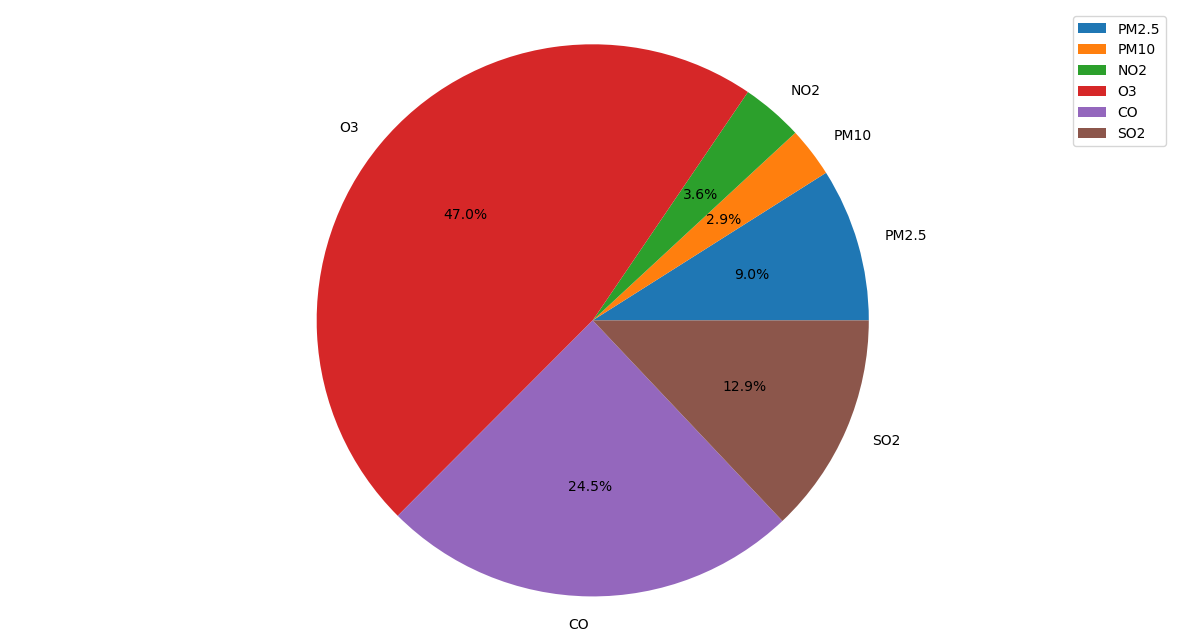

In [17]:
# Calculate the total concentration of each pollutant
no2_concentration = merged_df['NO2_median'].sum()
so2_concentration = merged_df['SO2_median'].sum()
co_concentration = merged_df['CO_median'].sum()
pm25_concentration = merged_df['PM25_median'].sum()
pm10_concentration = merged_df['PM10_median'].sum()
o3_concentration = merged_df['O3_median'].sum()

# Create a list of the pollutant concentrations
concentrations = [no2_concentration, so2_concentration, co_concentration, pm25_concentration, pm10_concentration, o3_concentration]

# Create a list of the pollutant names
pollutants = ['PM2.5','PM10','NO2','O3', 'CO', 'SO2']
plt.figure(figsize=(15, 8))
# Plot the pollutant concentrations in a pie chart
plt.pie(concentrations, labels=pollutants, autopct='%1.1f%%')
plt.axis('equal')
plt.legend(loc= 'upper right')
plt.show()

In [18]:
#Replacing missing values:
AQI_DATA.fillna(0, inplace=True)
missing_values= missing_values_table(AQI_DATA)
missing_values.style.background_gradient(cmap='Reds')

Your selected dataframe has 9 columns.
There are 0 columns that have missing values.


,% of Total Values
Columns,


##### Calculating AQI Index and thier respective AQI Level according to US EPA 2016 standards 

In [19]:
def get_AQI_bucket(x):
    if x <= 50:
        return "Good"
    elif x <= 100:
        return "Moderate"
    elif x <= 150:
        return "Unhealthy for Sensitive Groups"
    elif x <= 200:
        return "Unhealthy"
    elif x <= 300:
        return "Very Unhealthy"
    elif x > 300:
        return "Hazardous"
    else:
        return np.NaN

AQI_DATA["Checks"] = (AQI_DATA["pm25i"] > 0).astype(int) + \
                (AQI_DATA["pm10i"] > 0).astype(int) + \
                (AQI_DATA["si"] > 0).astype(int) + \
                (AQI_DATA["ni"] > 0).astype(int) + \
                (AQI_DATA["ci"] > 0).astype(int) + \
                (AQI_DATA["o3i"] > 0).astype(int)

AQI_DATA["AQI_calculated"] = round(AQI_DATA[["pm25i", "pm10i", "si", "ni", "ci", "o3i"]].max(axis = 1))
AQI_DATA.loc[AQI_DATA["pm25i"] + AQI_DATA["pm10i"] <= 0, "AQI_calculated"] = np.NaN
AQI_DATA.loc[AQI_DATA.Checks < 3, "AQI_calculated"] = np.NaN

AQI_DATA["AQI_bucket_calculated"] = AQI_DATA["AQI_calculated"].apply(lambda x: get_AQI_bucket(x))
AQI_DATA[~AQI_DATA.AQI_calculated.isna()].head(13)

,Country,City,Date,pm25i,pm10i,si,ni,ci,o3i,Checks,AQI_calculated,AQI_bucket_calculated
0,GB,Liverpool,2019-09-30,21.666667,7.0,0.750,9.0,0.0,13.4,5,22.0,Good
14030,JP,Nara-shi,2019-09-30,88.333333,16.0,5.375,7.0,117.5,18.4,6,118.0,Unhealthy for Sensitive Groups
14029,JP,Nara-shi,2019-09-30,88.333333,16.0,5.375,7.0,117.5,18.4,6,118.0,Unhealthy for Sensitive Groups
14028,JP,Nara-shi,2019-09-30,88.333333,16.0,5.375,7.0,117.5,18.4,6,118.0,Unhealthy for Sensitive Groups
14027,JP,Nara-shi,2019-09-30,88.333333,16.0,5.375,7.0,117.5,18.4,6,118.0,Unhealthy for Sensitive Groups
14026,JP,Nara-shi,2019-09-30,88.333333,16.0,5.375,7.0,117.5,18.4,6,118.0,Unhealthy for Sensitive Groups
14025,JP,Nara-shi,2019-09-30,88.333333,16.0,5.375,7.0,117.5,18.4,6,118.0,Unhealthy for Sensitive Groups
14024,JP,Nara-shi,2019-09-30,88.333333,16.0,5.375,7.0,117.5,18.4,6,118.0,Unhealthy for Sensitive Groups
14031,JP,Nara-shi,2019-09-30,88.333333,16.0,5.375,7.0,117.5,18.4,6,118.0,Unhealthy for Sensitive Groups
14023,JP,Nara-shi,2019-09-30,88.333333,16.0,5.375,7.0,117.5,18.4,6,118.0,Unhealthy for Sensitive Groups


#### Some more data Wrangling

- Data source uses country codes to tag "Country" - matched names to Country Names for easier data wrangling (Used Dictionary)
- Getting the coordinates for each city in the dataset to plot maps


In [20]:
def get_country_name(country_code):
    country = pycountry.countries.get(alpha_2=country_code)
    if country is None:
        return ""
    return country.name

AQI_DATA['Country_Name'] = AQI_DATA['Country'].apply(lambda x: get_country_name(x))

AQI_DATA['Date'] = pd.to_datetime(AQI_DATA['Date'])
#AQI_DATA['Date'] = AQI_DATA['Date'].dt.strftime('%Y-%m-%d')
AQI_DATA['Year'] = AQI_DATA['Date'].dt.year
AQI_DATA['Month'] = AQI_DATA['Date'].dt.month
AQI_DATA['Day'] = AQI_DATA['Date'].dt.day
#### How is AQI spread across different Countries during COVID (2020-2021) (2019-Quarter 4 to 2021-Quarter 1)display(AQI_DATA)

## Guiding Question #1

### How is AQI spread across different Countries during COVID (2019-Quarter 4 to 2021-Quarter 4)

#### Interactive Graph showing geographical view of AQI data of countries from 08-2019 to 12-2022

In [21]:
#To be Uncommented
# # #Visualising the AQI Across Countries Over Time ( 2019-2021 )
# AQI_DATA['Date'] = pd.to_datetime(AQI_DATA['Date'])
# AQI_DATA['Month_Year'] = AQI_DATA['Date'].dt.to_period("M")
# # AQI_DATA = AQI_DATA.set_index('Date')
# AQI_DATA['Month_Year'] = AQI_DATA['Date'].dt.strftime('%m-%Y')

# # #To be Uncommented
# fig = px.choropleth ( AQI_DATA.sort_values("Date"),locations="Country_Name",color="AQI_calculated",locationmode="country names",animation_frame="Month_Year", 
#                      #Creating fixed scale (the same as defined by EPA)
#               color_continuous_scale = [(0.00, "green"),   (0.1, "green"),
#                                         (0.1, "yellow"), (0.2, "yellow"),
#                                         (0.2, "orange"),  (0.3, "orange"),
#                                         (0.3, "red"),  (0.4, "red"),
#                                         (0.4, "purple"),  (0.6, "purple"),
#                                         (0.6, "maroon"),  (1.00, "maroon"),
#                                         ])
# fig.update_layout(title="AQI Comparison by Countries")
# fig.update_layout(width=1000, height=400)
# fig.show()

# pio.write_html(fig, file='AQI_animation.html', auto_open=True)
##Referred: https://www.geeksforgeeks.org/how-to-save-matplotlib-animation/

#### Visualizing AQI average for Major Countries in 2020 and 2021
Filtering Data only for Major Countries : 'Brazil', 'China', 'India', 'United States', 'France', 'Italy', 'Canada' to a seperate data frame 

/var/folders/ww/hlh34hh14_xcs0tf0jkznr6r0000gn/T/ipykernel_8742/786309226.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/ww/hlh34hh14_xcs0tf0jkznr6r0000gn/T/ipykernel_8742/786309226.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/ww/hlh34hh14_xcs0tf0jkznr6r0000gn/T/ipykernel_8742/786309226.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

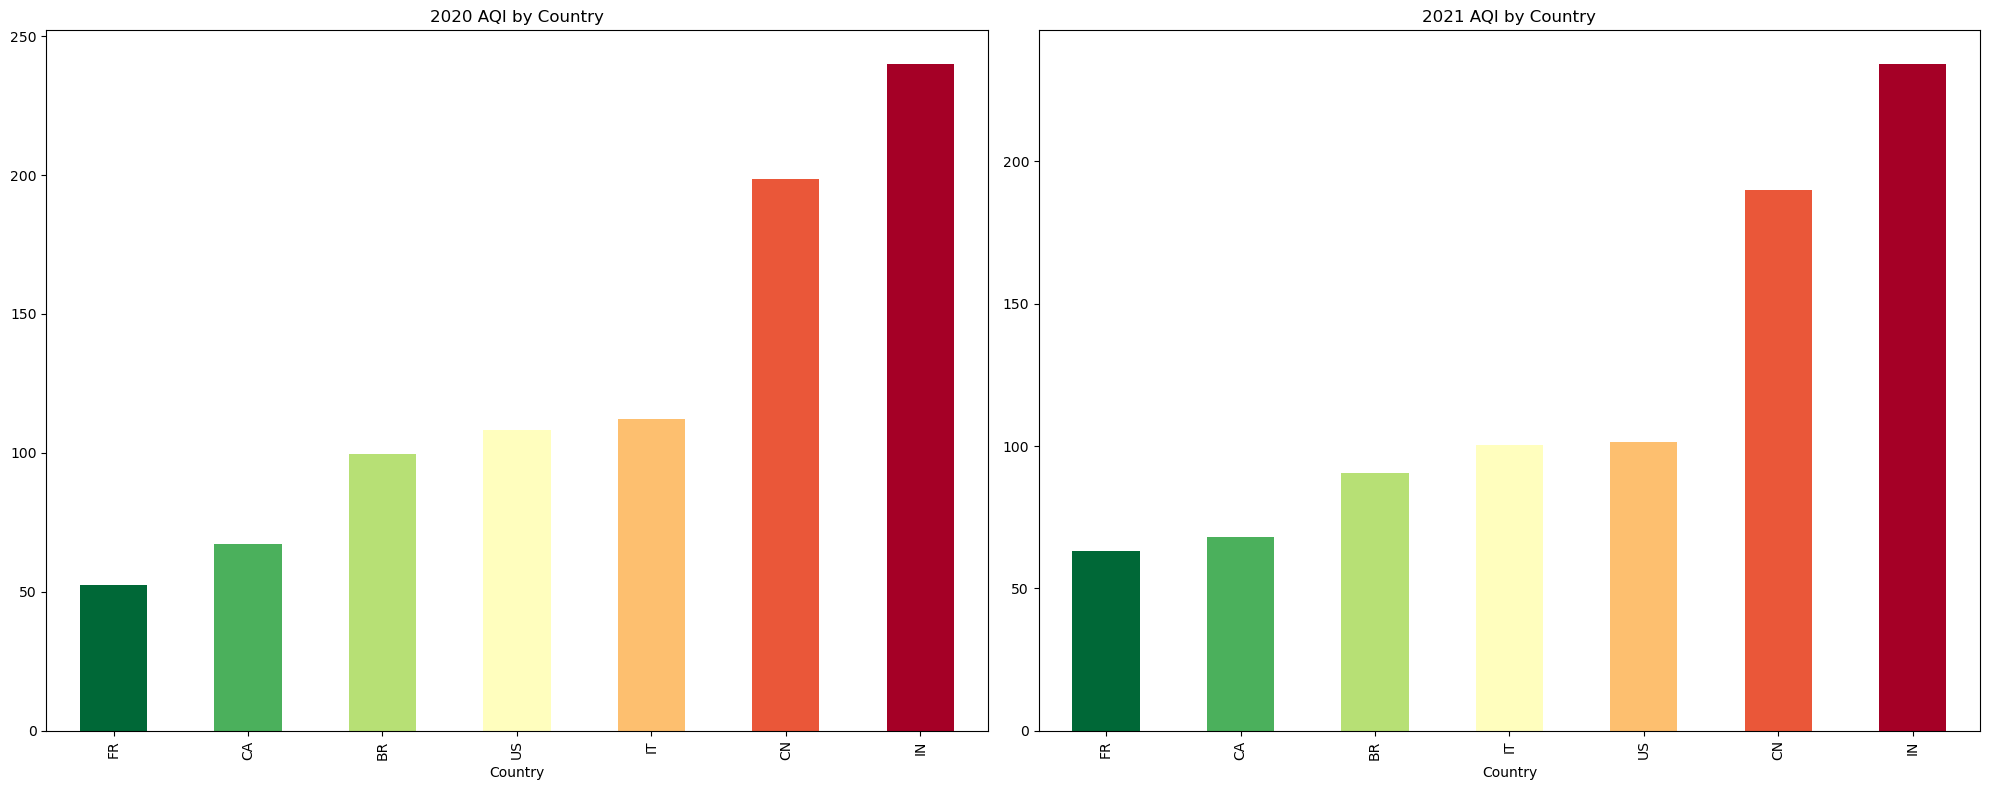

In [22]:
#AQI Level Average across Major countries : 'Brazil', 'China', 'India', 'United States', 'France', 'Italy', 'Canada' in 2020 and 2021

#Select the countries
countries = ['BR', 'CN', 'IN', 'US', 'FR', 'IT', 'CA']
AQI_DATA_Major = AQI_DATA[AQI_DATA['Country'].isin(countries)]
AQI_DATA_Major['Date'] = pd.to_datetime(AQI_DATA_Major['Date'])

#AQI_DATA['Date'] = AQI_DATA['Date'].dt.strftime('%Y-%m-%d')
AQI_DATA_Major['Year'] = AQI_DATA_Major['Date'].dt.year
AQI_DATA_Major['Month'] = AQI_DATA_Major['Date'].dt.month
AQI_DATA_Major['Day'] = AQI_DATA_Major['Date'].dt.day

#Group by year and country to get average AQI for each year and country
AQI_Yearly = AQI_DATA_Major.groupby(['Year', 'Country']).mean()['AQI_calculated']
#display(AQI_Yearly)
#Plot the subplots for each year, 2020 and 2021
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,8))

#2020 subplot
AQI_Yearly.loc[2020].sort_values().plot(kind='bar', ax=ax1, color=cm.RdYlGn_r(np.linspace(0, 1, len(countries))))
ax1.set_title('2020 AQI by Country')

#2021 subplot
AQI_Yearly.loc[2021].sort_values().plot(kind='bar', ax=ax2, color=cm.RdYlGn_r(np.linspace(0, 1, len(countries))))
ax2.set_title('2021 AQI by Country')

plt.tight_layout()
plt.show()



#### Key Findings:

- India has the most hazardous air quality with an AQI over 250.
- China's air quality is considered unhealthy, with an AQI over 150.
- The air quality in the USA and Brazil is considered unhealthy for sensitive groups, with an AQI over 100.
- Canada and France have a moderate air quality average for both years.


##### Some more data Wrangling

- To plot maps, we need to obtain the coordinates for each city in the dataset.
- Step 1: Create a dataframe to store all cities and countries.
- Step 2: Use the geolocator.geocode function to obtain the coordinates for each city and country.
- Step 3: Use a lambda function to separate the latitude and longitude values, and store them in the dataset.
- Step 4: Check for missing values after the calculations to ensure no null values are present.Replace null values if necessary

In [23]:
countries = ['BR', 'CN', 'IN', 'US', 'FR', 'IT', 'CA']
AQI_DATA_Major = AQI_DATA[AQI_DATA['Country'].isin(countries)]

#Group Unique Cities and Countries
unique_cities = AQI_DATA_Major[['City', 'Country_Name']].drop_duplicates()
display(unique_cities)

,City,Country_Name
13989,Edmonton,Canada
14125,San Antonio,United States
13866,Shenzhen,China
13948,Suzhou,China
14317,Harbin,China
...,...,...
152764,Richmond,United States
3344054,Columbia,United States
906851,Nagpur,India
1274660,Mysore,India


In [24]:
#Calculate Coordinates for Grouped Unique Cities and Countries
geolocator = Nominatim(user_agent="geoapiExercises")

def get_coordinates(city, country):
    location = geolocator.geocode(f"{city}, {country}")
    return (location.latitude, location.longitude)

#AQI_DATA_Major['Coordinates'] = AQI_DATA_Major.apply(lambda x: get_coordinates(x['City'], x['Country_Name']), axis=1)
#Get coordinates for each city and country
unique_cities['coordinates'] = unique_cities.apply(lambda x: get_coordinates(x['City'], x['Country_Name']), axis=1)

#Check the result
unique_cities.head()

#Referred: https://www.w3resource.com/python-exercises/geopy/python-geopy-nominatim_api-exercise-4.php

,City,Country_Name,coordinates
13989,Edmonton,Canada,"(53.5462055, -113.491241)"
14125,San Antonio,United States,"(29.4246002, -98.4951405)"
13866,Shenzhen,China,"(22.5445741, 114.0545429)"
13948,Suzhou,China,"(31.3016935, 120.5810725)"
14317,Harbin,China,"(45.8016143, 126.5287796)"


In [25]:
#Map the calculated coordinates for Grouped Unique Cities and Countries in the AQI_Major_Data dataframe
AQI_DATA_Major = AQI_DATA_Major.merge(unique_cities[['City', 'Country_Name', 'coordinates']], on=['City', 'Country_Name'], how='left')

AQI_DATA_Major['latitude'] = AQI_DATA_Major['coordinates'].apply(lambda x: x[0])
AQI_DATA_Major['longitude'] = AQI_DATA_Major['coordinates'].apply(lambda x: x[1])

AQI_DATA_Major.fillna(value=0, inplace=True)
missing_values= missing_values_table(AQI_DATA_Major)
missing_values.style.background_gradient(cmap='Reds')

Your selected dataframe has 19 columns.
There are 0 columns that have missing values.


,% of Total Values
Columns,


#### Visualizing the AQI across these countries over time via a Bubble map (Animated time frame accross the world)
creating a scatter map using Plotly Express, using the AQI_DATA_Major dataframe. The latitude and longitude values will be used for plotting the points on the map. The AQI values will determine the color and size of the points. The animation frame is set to "Date" and the animation group is set to "City". 

In [26]:
#To be Uncommented
# AQI_DATA_Major['AQI_bucket_calculated'] = AQI_DATA_Major['AQI_bucket_calculated'].replace(0, np.nan)
# AQI_DATA_Major['Date'] = pd.to_datetime(AQI_DATA_Major['Date'])
# AQI_DATA_Major['Month'] = AQI_DATA_Major['Date'].dt.strftime('%Y-%m')

# fig = px.scatter_mapbox(AQI_DATA_Major, lat="latitude", lon="longitude", color="AQI_bucket_calculated",
#                         color_continuous_scale = [(0.0, "green"),   (50.0, "green"),
#                                         (50.0, "yellow"), (100.0, "yellow"),
#                                         (100.0, "orange"),  (150.0, "orange"),
#                                         (150.0, "red"),  (200.0, "red"),
#                                         (200.0, "purple"),  (250.0, "purple"),
#                                         (250.0, "maroon"),  (300.0, "maroon"),
#                                         ], size="AQI_calculated", size_max=30,
#                         animation_frame="Month", animation_group="City",
#                         mapbox_style="carto-positron", zoom=1)

# fig.update_layout(width=1200, height=600)
# fig.show()
# pio.write_html(fig, file='AQI_city_animation.html', auto_open=True)
#Referred:
#https://community.plotly.com/t/proper-way-to-save-a-plot-to-html/7063/9

#### Visualizing the AQI across these countries over time taking moving average of the AQI value

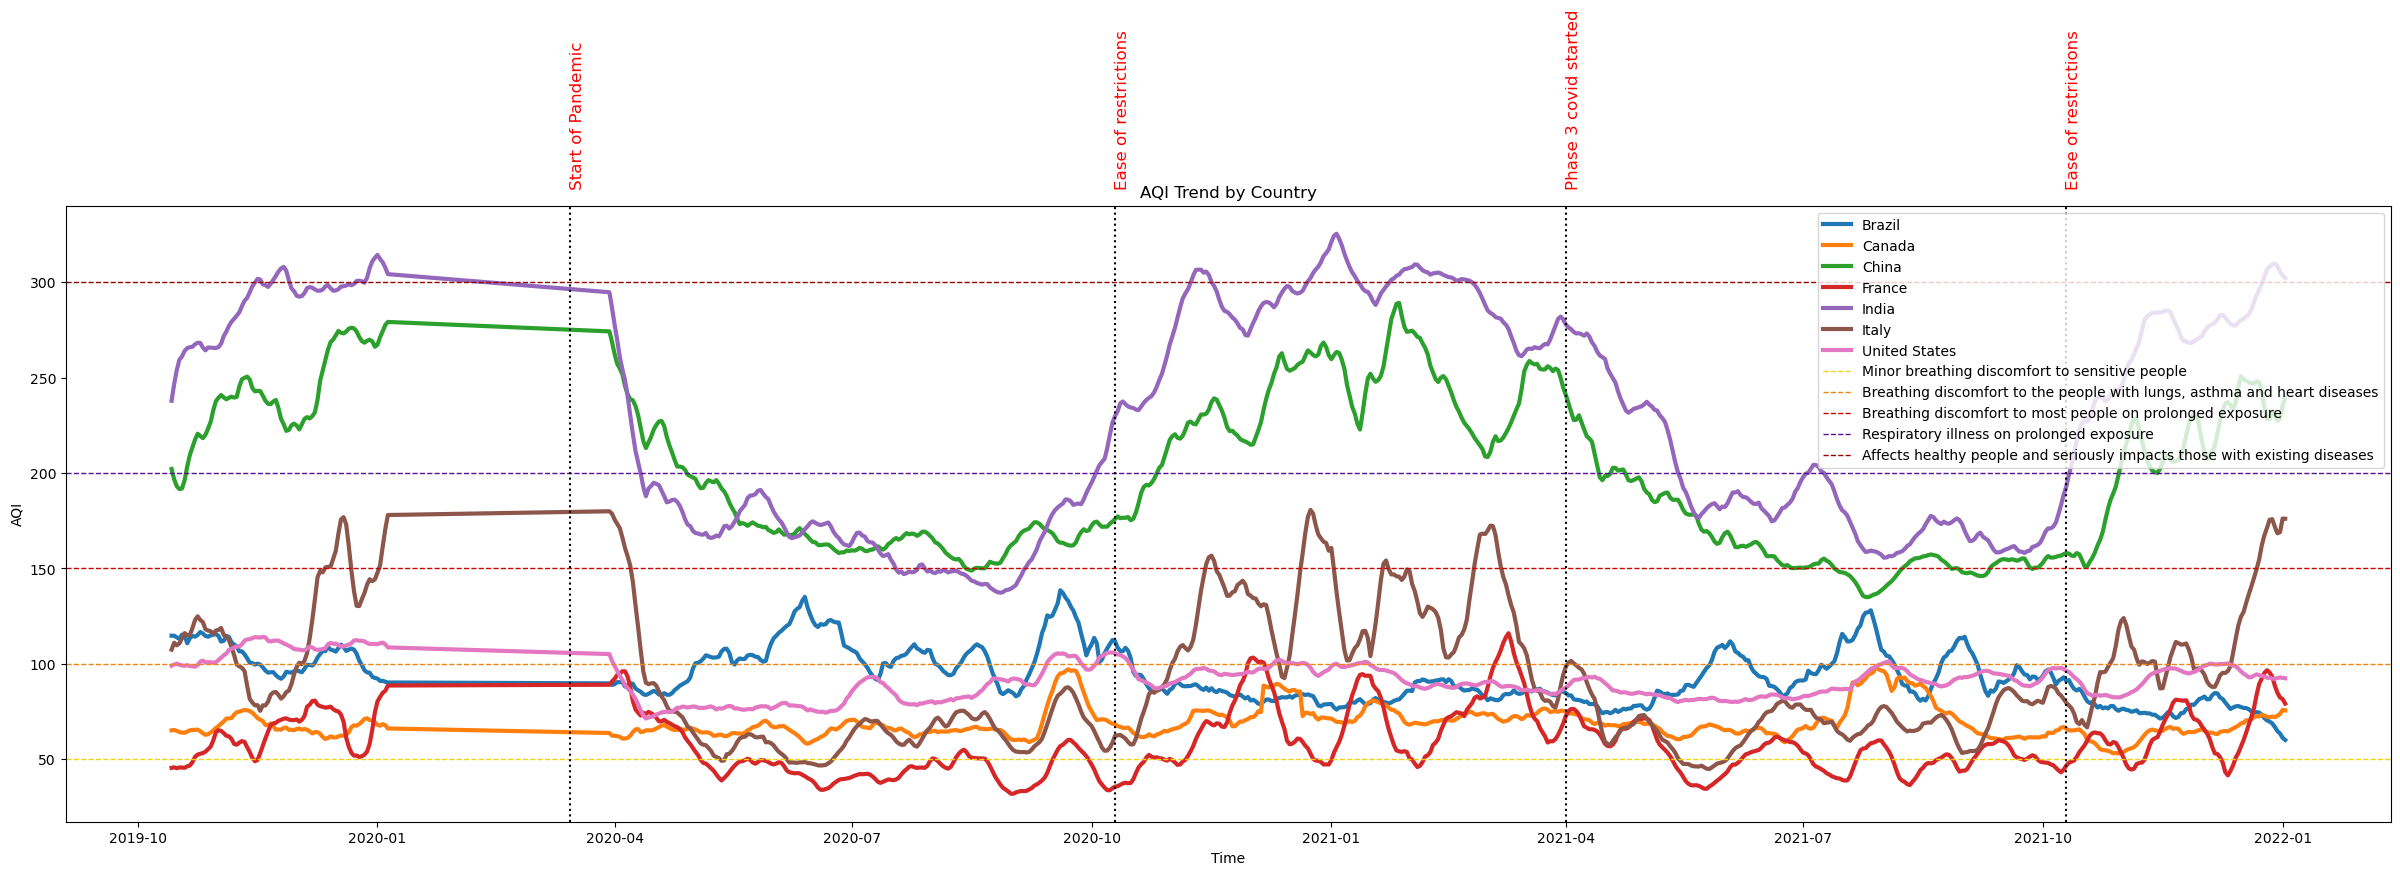

In [27]:
#Group by country and year to get the average AQI for each country in each year
AQI_country_yearly = AQI_DATA_Major.groupby(['Country_Name', 'Date']).mean()['AQI_calculated']

#Defining AQI Levels
moderate=50
unhealthy_sensitive_groups=100
unhealthy=150
very_unhealthy=200
hazardous=300

# Plot the trend in AQI for each country
window_size = 15
plt.figure(figsize=(30,8))
plt.grid(False)
for country in AQI_country_yearly.index.get_level_values(0).unique():
    rolling_mean = AQI_country_yearly.loc[country].rolling(window_size).mean()
    plt.plot(rolling_mean, label=country, linewidth=3)

plt.xlabel('Time')
plt.ylabel('AQI')
plt.title('AQI Trend by Country')
plt.axhline(y=moderate,color='#F6D20E',ls='--', fillstyle='full', linewidth=1, label="Minor breathing discomfort to sensitive people")
plt.axhline(y=unhealthy_sensitive_groups,color='#EF8414',ls='--', linewidth=1, label="Breathing discomfort to the people with lungs, asthma and heart diseases")
plt.axhline(y=unhealthy,color='#CC0000',ls='--', linewidth=1, label="Breathing discomfort to most people on prolonged exposure")   
plt.axhline(y=very_unhealthy,color='#58109C',ls='--', linewidth=1, label="Respiratory illness on prolonged exposure")
plt.axhline(y=hazardous,color='#990000',ls='--', linewidth=1, label="Affects healthy people and seriously impacts those with existing diseases")
plt.axvline(x='2020-03-15', color='black', linestyle=':')
plt.axvline(x='2020-10-10', color='black', linestyle=':')
plt.axvline(x='2021-04-01', color='black', linestyle=':')
plt.axvline(x='2021-10-10', color='black', linestyle=':')
#Adding labels for events
plt.text('2020-03-15', 350, "Start of Pandemic", rotation=90, color='red', fontsize=12)
plt.text('2020-10-10', 350, "Ease of restrictions", rotation=90, color='red', fontsize=12)
plt.text('2021-04-01', 350, "Phase 3 covid started", rotation=90, color='red', fontsize=12)
plt.text('2021-10-10', 350, "Ease of restrictions", rotation=90, color='red', fontsize=12)
plt.legend()
plt.show()



#### Key observations

- India and China seem to have the most polluted air throughout the given time frame, with India being the most polluted.
- In March 15, 2020, the World Health Organization declared COVID-19 as a pandemic, which led to regional lockdowns in April and May. This may have caused the dip in AQI levels in all countries during the same period.
- The AQI levels have decreased significantly in some countries during the pandemic, while remaining relatively stable in others. This variation can be attributed to the different measures taken by countries to control the spread of the virus and the impact of lockdowns on economic and industrial activities.
- AQI levels started to rise in October 2020 as restrictions were eased during Stage 2 and continued to increase until the start of Phase 3 in 2021, as people returned to work and other economic activities.
- The discovery of the Delta variant in mid-2021 resulted in another round of regional lockdowns, leading to a decrease in AQI levels in mid-2021.
 

#### Most Polluted Country and Most Polluted City

To find the most polluted city and country based on the average AQI:
- The AQI data is first grouped by city and year to get the average AQI for each city in each year.
- Then, the data is sorted to find the city with the highest AQI, which is identified as the most polluted city. - - The average AQI of this city is also calculated and retuned.
- The same process is repeated for countries. 
- AQI data is grouped by country to get the average AQI for each country, and then the data is sorted to find the country with the highest AQI. 
- The average AQI of this country is also calculated and returned.

In [28]:
#Group by city and year to get the average AQI for each city in each year

AQI_city_yearly = AQI_DATA_Major.groupby(['City', 'Year']).mean()['AQI_calculated']

#Sort the data to find the city with the highest AQI

most_polluted_city = AQI_city_yearly.sort_values(ascending=False).index[0][0]
most_polluted_city_AQI = AQI_city_yearly.loc[most_polluted_city].mean()

#Print the most polluted city and its AQI

print(f'The most polluted city is {most_polluted_city} with an average AQI of {most_polluted_city_AQI:.2f}')

#Group by country to get the average AQI for each country

AQI_country = AQI_DATA_Major.groupby('Country_Name').mean()['AQI_calculated']

#Sort the data to find the country with the highest AQI

most_polluted_country = AQI_country.sort_values(ascending=False).index[0]
most_polluted_country_AQI = AQI_country.loc[most_polluted_country]

#Print the most polluted country and its AQI

print(f'The most polluted country is {most_polluted_country} with an average AQI of {most_polluted_country_AQI:.2f}')

The most polluted city is Delhi with an average AQI of 363.90
The most polluted country is India with an average AQI of 264.67


#### Visualizing most polluted country in a geographical view

In [29]:
#Most Polluted Country:

# Convert the "Date" column to a datetime type
AQI_DATA_Major['Date'] = pd.to_datetime(AQI_DATA_Major['Date'])

# Group the data by country and calculate the average AQI
grouped_data = AQI_DATA_Major.groupby(['Country_Name']).mean()

# Sort the data by AQI in descending order
grouped_data = grouped_data.sort_values('AQI_calculated', ascending=False)

# Pick the top country with the highest AQI
most_polluted_country = grouped_data.index[0]

# Plot the data for the most polluted country
most_polluted_country_data = AQI_DATA_Major[AQI_DATA_Major['Country_Name'] == most_polluted_country]

# Define the color mapping for AQI levels
def get_color(aqi):
    if aqi < 50:
        return 'green'
    elif aqi < 100:
        return 'yellow'
    elif aqi < 150:
        return 'orange'
    elif aqi < 200:
        return 'red'
    elif aqi < 300:
        return 'purple'
    else:
        return 'maroon'
#To be uncommented
# # Create a folium map centered on the country
# latitude = most_polluted_country_data['latitude'].mean()
# longitude = most_polluted_country_data['longitude'].mean()
# country_map = folium.Map(location=[latitude, longitude], zoom_start=6)

# # Add a marker for each location in the AQI data
# for lat, lon, aqi in zip(most_polluted_country_data['latitude'], most_polluted_country_data['longitude'], most_polluted_country_data['AQI_calculated']):
#     folium.CircleMarker([lat, lon],
#                         radius=5,
#                         weight=0.5,
#                         color='red',
#                         fill_color=get_color(aqi),
#                         fill_opacity=0.7).add_to(country_map)

# # Show the map
# country_map
# country_map.save("mostPollutedCountry.html")

##### Checking AQI distribution among the cities of each Country

<b>Some more data Wrangling

- Filtering Data frame for each country
- Grouping City wise data by taking mean average of the AQI Calculated
- Sorting these cities by their average AQI Value
    -  Most to least polluted city

###### AQI in cities of INDIA

In [30]:
AQI_DATA_Major_IN=AQI_DATA_Major[AQI_DATA_Major['Country']=='IN']
AQI_DATA_Major_IN = AQI_DATA_Major_IN.set_index('Date')
AQI_by_city_IN = AQI_DATA_Major_IN.groupby('City').mean()['AQI_calculated']
AQI_by_city_IN_sorted = AQI_by_city_IN.sort_values(ascending=False)
AQI_by_city_IN_filtered = AQI_by_city_IN_sorted[AQI_by_city_IN_sorted != 0]
fig = px.bar(AQI_by_city_IN_filtered,x=AQI_by_city_IN_filtered.index,y=AQI_by_city_IN_filtered.values,color=AQI_by_city_IN_filtered.values,# Creating fixed scale (the same as defined by EPA)
              color_continuous_scale = "temps", text=AQI_by_city_IN_filtered.values,title="AQI in cities of INDIA", labels = {'y':'Average AQI Value'})
fig.update_traces(textposition='outside')
fig.show()

###### AQI in cities of China

In [31]:
AQI_DATA_Major_CN=AQI_DATA_Major[AQI_DATA_Major['Country']=='CN']
AQI_DATA_Major_CN = AQI_DATA_Major_CN.set_index('Date')

AQI_by_city_CN = AQI_DATA_Major_CN.groupby('City').mean()['AQI_calculated']
AQI_by_city_CN_sorted = AQI_by_city_CN.sort_values(ascending=False)
fig = px.bar(AQI_by_city_CN_sorted,x=AQI_by_city_CN_sorted.index,y=AQI_by_city_CN_sorted.values,color=AQI_by_city_CN_sorted.values,color_continuous_scale="temps",labels = {'y':'Average AQI Value'},title="AQI in cities of CHINA")
fig.update_traces(textposition='outside')
fig.show()

###### AQI in cities of United States of America (USA)

In [32]:
AQI_DATA_Major_US=AQI_DATA_Major[AQI_DATA_Major['Country']=='US']
AQI_DATA_Major_US = AQI_DATA_Major_US.set_index('Date')
AQI_by_city_US = AQI_DATA_Major_US.groupby('City').mean()['AQI_calculated']
AQI_by_city_US_sorted = AQI_by_city_US.sort_values(ascending=False)
AQI_by_city_US_filtered = AQI_by_city_US_sorted[AQI_by_city_US_sorted != 0]
fig = px.bar(AQI_by_city_US_filtered,x=AQI_by_city_US_filtered.index,y=AQI_by_city_US_filtered.values,labels = {'y':'Average AQI Value'}, color=AQI_by_city_US_filtered.values,color_continuous_scale="temps", text=AQI_by_city_US_filtered.values,title="AQI in cities of USA")
fig.update_traces(textposition='outside')
# ax.xlabel('Cities')
# fig.ylabel('AQI Levels')
fig.show()

###### AQI in cities of Canada

In [33]:
AQI_DATA_Major_CA=AQI_DATA_Major[AQI_DATA_Major['Country']=='CA']
AQI_DATA_Major_CA = AQI_DATA_Major_CA.set_index('Date')
AQI_by_city_CA = AQI_DATA_Major_CA.groupby('City').mean()['AQI_calculated']
AQI_by_city_CA_sorted = AQI_by_city_CA.sort_values(ascending=False)
fig = px.bar(AQI_by_city_CA_sorted,x=AQI_by_city_CA_sorted.index,y=AQI_by_city_CA_sorted.values,labels = {'y':'Average AQI Value'},color=AQI_by_city_CA_sorted.values,color_continuous_scale="temps", text=AQI_by_city_CA_sorted.values,title="AQI in cities of CANADA")
fig.update_traces(textposition='outside')
fig.show()

###### AQI in cities of Italy

In [34]:
AQI_DATA_Major_IT=AQI_DATA_Major[AQI_DATA_Major['Country']=='IT']
AQI_DATA_Major_IT = AQI_DATA_Major_IT.set_index('Date')
AQI_by_city_IT = AQI_DATA_Major_IT.groupby('City').mean()['AQI_calculated']
AQI_by_city_IT_sorted = AQI_by_city_IT.sort_values(ascending=False)
fig = px.bar(AQI_by_city_IT_sorted,x=AQI_by_city_IT_sorted.index,y=AQI_by_city_IT_sorted.values,labels = {'y':'Average AQI Value'},color=AQI_by_city_IT_sorted.values,color_continuous_scale="temps", text=AQI_by_city_IT_sorted.values,title="AQI in cities of ITALY")
fig.update_traces(textposition='outside')
fig.show()

###### AQI in cities of Brazil

In [35]:
AQI_DATA_Major_BR=AQI_DATA_Major[AQI_DATA_Major['Country']=='BR']
AQI_DATA_Major_BR = AQI_DATA_Major_BR.set_index('Date')
AQI_by_city_BR = AQI_DATA_Major_BR.groupby('City').mean()['AQI_calculated']
AQI_by_city_BR_sorted = AQI_by_city_BR.sort_values(ascending=False)
fig = px.bar(AQI_by_city_BR_sorted,x=AQI_by_city_BR_sorted.index,y=AQI_by_city_BR_sorted.values,labels = {'y':'Average AQI Value'},color=AQI_by_city_BR_sorted.values,color_continuous_scale="temps", text=AQI_by_city_BR_sorted.values,title="AQI in cities of BRAZIL")
fig.update_traces(textposition='outside')
fig.show()

###### AQI in cities of France

In [36]:
AQI_DATA_Major_FR=AQI_DATA_Major[AQI_DATA_Major['Country']=='FR']
AQI_DATA_Major_FR = AQI_DATA_Major_FR.set_index('Date')
AQI_by_city_FR = AQI_DATA_Major_FR.groupby('City').mean()['AQI_calculated']
AQI_by_city_FR_sorted = AQI_by_city_FR.sort_values(ascending=False)
fig = px.bar(AQI_by_city_FR_sorted,x=AQI_by_city_FR_sorted.index,y=AQI_by_city_FR_sorted.values,labels = {'y':'Average AQI Value'},color=AQI_by_city_FR_sorted.values,color_continuous_scale="temps", text=AQI_by_city_FR_sorted.values,title="AQI in cities of FRANCE")
fig.update_traces(textposition='outside')
fig.show()


#### Visualizing the AQI level of most polluted city across time

In [37]:
#Filter the data to only include the most polluted city
most_polluted_city_data = most_polluted_country_data[most_polluted_country_data["City"] == most_polluted_city]
print(most_polluted_city_data.groupby(['Month_Year'])['AQI_calculated'].mean())
#Plot the AQI data for the most polluted city
plt.figure(figsize=(20, 8))
plt.plot(most_polluted_city_data["Date"], most_polluted_city_data["AQI_calculated"], ':', label='Raw AQI', alpha=0.5)

#Smoothen the data by taking a moving average

window_size = 15 # days
rolling_mean = most_polluted_city_data["AQI_calculated"].rolling(window=window_size).mean()

plt.plot(most_polluted_city_data["Date"], rolling_mean, label='AQI (Smoothened)', color='black')

plt.title(f'AQI of the {most_polluted_city} with an average AQI of {most_polluted_city_AQI:.2f}')
# plt.axhline(y=moderate,color='#F6D20E',ls='--', fillstyle='full', linewidth=1, label="Minor breathing discomfort to sensitive people")
plt.axhline(y=unhealthy_sensitive_groups,color='#EF8414',ls='--', linewidth=3, label="Breathing discomfort to the people with lungs, asthma and heart diseases")
plt.axhline(y=unhealthy,color='#CC0000',ls='--', linewidth=3, label="Breathing discomfort to most people on prolonged exposure")   
plt.axhline(y=very_unhealthy,color='#58109C',ls='--', linewidth=3, label="Respiratory illness on prolonged exposure")
plt.axhline(y=hazardous,color='#990000',ls='--', linewidth=3, label="Affects healthy people and seriously impacts those with existing diseases")
plt.axvline(x='2020-03-15', color='red', linestyle=':', label="Start of Pandemic")
plt.legend()
plt.show()

KeyError: 'Month_Year'

From the data, we can observe the following trends:

- In general, the AQI of Delhi seems to be highest in the winter months of December, January, and February, and lowest in the summer months of June, July, and August.
- There was a significant increase in AQI in January 2021 compared to January 2020 and January 2022. This could be due to various factors such as weather conditions, increase in pollution levels, or changes in environmental policies.
- The AQI in March 2020 was relatively low, possibly due to the nationwide lockdown that was in place in India during that time. However, in March 2021, the AQI was higher than in March 2020, possibly due to the relaxation of lockdown measures.
- The AQI in September 2019 was relatively low, but it increased significantly in September 2020, possibly due to the end of monsoon season and the onset of winter.
- The AQI in October seems to be consistently high across the years, possibly due to the increase in crop burning during that time.
- Overall, the data shows that the AQI of Delhi is highly dependent on various factors such as weather conditions, seasonal changes, environmental policies, and human activities. It also highlights the need for constant monitoring and measures to control pollution levels in the city.

### Guiding Question 3: Correlation between pollutants and AQI :
To find the correlation between pollutants and AQI, we can use the corr method in Pandas. This method calculates the Pearson correlation coefficient between columns in a DataFrame. The correlation coefficient is a value between -1 and 1 that represents the strength of the linear relationship between two variables. A positive correlation means that as one variable increases, the other variable also increases. A negative correlation means that as one variable increases, the other variable decreases.


In [ ]:
# Create a correlation matrix of the pollutants
correlation_matrix = AQI_DATA_Major[['AQI_calculated', 'ni', 'ci', 'si', 'pm25i', 'pm10i', 'o3i']].corr()
#display(correlation_matrix)
# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True)

plt.show()

#Referred: https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e

###### Key Observations

In this matrix, AQI is highly correlated with PM2.5 (0.950752), PM10 (0.801915), and CO (0.764433), with moderate correlation with SO2 (0.589289) and weak correlation with NO2 (0.525227) and O3 (-0.125582).

The high correlation between AQI and PM2.5, PM10, and CO suggests that these pollutants are the main contributors to air pollution, while the weak correlation with NO2 and O3 suggests that they have a lesser impact.

###### Visualising relationship between AQI and Pollutants using scatter plots

In [ ]:
variables = ['pm25i','pm10i','ni','ci','si','o3i']
AQI_DATA_Major=AQI_DATA_Major[AQI_DATA_Major['AQI_bucket_calculated']!=0]
fig = plt.figure(figsize=(16,34))
for variable,num in zip(variables, range(1,len(variables)+1)):
    ax = fig.add_subplot(6,2,num)
    sns.scatterplot(x=variable, y='AQI_calculated', hue='AQI_bucket_calculated', palette="inferno", data=AQI_DATA_Major)
    plt.title('Relation between {} and AQI'.format(variable))
    plt.xlabel(variable)
    plt.ylabel('AQI')

###### PM2.5 -> This shows a proportional behaviour since AQI value increases as PM2.5 increases 
###### PM10 -> This also shows a proportional behaviour since AQI value increases as PM2.5 increasesh

In [ ]:
import matplotlib.colors
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(60,30))

# For SO2
Country_POLLUTANT_SO2 = AQI_DATA_Major[['Country','si']].groupby('Country').mean()
Country_POLLUTANT_SO2.reset_index(inplace = True)
Country_POLLUTANT_SO2.sort_values('si', ascending= False, inplace = True)
cmap_so2 = cm.get_cmap('BrBG')
norm_so2 = matplotlib.colors.Normalize(vmin=min(Country_POLLUTANT_SO2['si']), vmax=max(Country_POLLUTANT_SO2['si']))

Country_POLLUTANT_SO2.plot(kind = 'bar', figsize= (20,10), x = 'Country', fontsize= 15, color=cmap_so2(norm_so2(Country_POLLUTANT_SO2['si'])), title = 'Country & Pollutant Levels - SO2',ax=axes[0][0])

# For NO2
Country_POLLUTANT_NO2 = AQI_DATA_Major[['Country','ni']].groupby('Country').mean()
Country_POLLUTANT_NO2.reset_index(inplace = True)
Country_POLLUTANT_NO2.sort_values('ni', ascending= False, inplace = True)
cmap_no2 = cm.get_cmap('ocean_r')
norm_no2 = matplotlib.colors.Normalize(vmin=min(Country_POLLUTANT_NO2['ni']), vmax=max(Country_POLLUTANT_NO2['ni']))

Country_POLLUTANT_NO2.plot(kind = 'bar', figsize= (20,10), x = 'Country', fontsize= 15, color=cmap_no2(norm_no2(Country_POLLUTANT_NO2['ni'])), title = 'Country & Pollutant Levels - NO2',ax=axes[0][1])

# For CO
Country_POLLUTANT_CO = AQI_DATA_Major[['Country','ci']].groupby('Country').mean()
Country_POLLUTANT_CO.reset_index(inplace = True)
Country_POLLUTANT_CO.sort_values('ci', ascending= False, inplace = True)
cmap_co = cm.get_cmap('Blues')
norm_co = matplotlib.colors.Normalize(vmin=min(Country_POLLUTANT_CO['ci']), vmax=max(Country_POLLUTANT_CO['ci']))

Country_POLLUTANT_CO.plot(kind = 'bar', figsize= (20,10), x = 'Country', fontsize= 15, color=cmap_co(norm_co(Country_POLLUTANT_CO['ci'])), title = 'Country & Pollutant Levels - CO', ax=axes[1][0])

Country_POLLUTANT_O3 = AQI_DATA_Major[['Country','o3i']].groupby('Country').mean()
Country_POLLUTANT_O3.reset_index(inplace = True)
Country_POLLUTANT_O3.sort_values('o3i', ascending= False, inplace = True)
cmap_o = cm.get_cmap('crest_r')
norm_o = matplotlib.colors.Normalize(vmin=min(Country_POLLUTANT_O3['o3i']), vmax=max(Country_POLLUTANT_O3['o3i']))

Country_POLLUTANT_O3.plot(kind = 'bar', figsize= (20,10), x = 'Country', fontsize= 15, color=cmap_o(norm_o(Country_POLLUTANT_O3['o3i'])), title = 'Country & Pollutant Levels -O3', ax=axes[1][1])

Country_POLLUTANT_PM10 = AQI_DATA_Major[['Country','pm10i']].groupby('Country').mean()
Country_POLLUTANT_PM10.reset_index(inplace = True)
Country_POLLUTANT_PM10.sort_values('pm10i', ascending= False, inplace = True)
cmap_pm10 = cm.get_cmap('autumn_r')
norm_pm10 = matplotlib.colors.Normalize(vmin=min(Country_POLLUTANT_PM10['pm10i']), vmax=max(Country_POLLUTANT_PM10['pm10i']))

Country_POLLUTANT_PM10.plot(kind = 'bar', figsize= (20,10), x = 'Country', fontsize= 15, color=cmap_pm10(norm_pm10(Country_POLLUTANT_PM10['pm10i'])), title = 'Country & Pollutant Levels -PM10', ax=axes[2][0])

Country_POLLUTANT_PM25 = AQI_DATA_Major[['Country','pm25i']].groupby('Country').mean()
Country_POLLUTANT_PM25.reset_index(inplace = True)
Country_POLLUTANT_PM25.sort_values('pm25i', ascending= False, inplace = True)
cmap_pm25 = cm.get_cmap('jet')
norm_pm25 = matplotlib.colors.Normalize(vmin=min(Country_POLLUTANT_PM25['pm25i']), vmax=max(Country_POLLUTANT_PM25['pm25i']))

Country_POLLUTANT_PM25.plot(kind = 'bar', figsize= (20,10), x = 'Country', fontsize= 15, color=cmap_pm25(norm_pm25(Country_POLLUTANT_PM25['pm25i'])), title = 'Country & Pollutant Levels -PM25', ax=axes[2][1])


#

#### Analyze the impact of AQI on COVID in each country.
We fetch the COVID data from a CSV file from the Data Source: https://www.kaggle.com/datasets/josephassaker/covid19-global-dataset. The Data has Columns:
- Daily Data Columns Description:

- date: designates the date of observation of the row's data in YYYY-MM-DD format.
- country: designates the Country in which the the row's data was observed.
- cumulative_total_cases: designates the cumulative number of confirmed cases as of the row's date, for the row's country.
- daily_new_cases: designates the daily new number of confirmed cases on the row's date, for the row's country.
- active_cases: designates the number of active cases (i.e., confirmed cases that still didn't recover nor die) on the row's date, for the row's country.
- cumulative_total_deaths: designates the cumulative number of confirmed deaths as of the row's date, for the row's country.
- daily_new_deaths: designates the daily new number of confirmed deaths on the row's date, for the row's country.

#### Data Wrangling on the data source:

- Convert the 'date' column to datetime format.
- Replace some country names to ensure consistency in the dataset. 
- Then, merge the COVID data with AQI data on the country name and date columns using the Pandas merge() function, and stores the result in merged_covid_aqi_data. 
- The merged dataset contains both COVID and AQI data for the countries and dates where both are available. 

In [ ]:
# Load the COVID data
covid_data = pd.read_csv("/Users/monicachandramurthy/Desktop/WAQI/worldometer_coronavirus_daily_data.csv")
covid_data['date'] = pd.to_datetime(covid_data['date'])
covid_data.info()
covid_data['country'] = covid_data['country'].replace({'China Hong Kong SAR': 'China', 'China Macao SAR': 'China'})
covid_data['country'] = covid_data['country'].replace({'USA': 'United States'})

AQI_DATA_Major['Date'] = pd.to_datetime(AQI_DATA_Major['Date'])
merged_covid_aqi_data = pd.merge(AQI_DATA_Major, covid_data, left_on=['Country_Name', 'Date'], right_on=['country', 'date'])
display(merged_covid_aqi_data)

merged_covid_aqi_data['Date'] = pd.to_datetime(merged_covid_aqi_data['Date'])
# merged_covid_aqi_data = merged_covid_aqi_data.set_index('Date')
merged_covid_aqi_data['Date'] = merged_covid_aqi_data['Date'].dt.strftime('%Y-%m-%d')
merged_covid_aqi_data['date'] = pd.to_datetime(merged_covid_aqi_data['date'])
print(f"The available data for combined_df is between {merged_covid_aqi_data['Date'].min()} and {merged_covid_aqi_data['Date'].max()}")
missing_values= missing_values_table(combined_df)
missing_values.style.background_gradient(cmap='Reds')
merged_covid_aqi_data.info()

#### To verify if there is any correlation between cumulative cases in Covid and AQI levels of the country

In [ ]:
covid_correlation_matrix = merged_covid_aqi_data[['AQI_calculated', 'cumulative_total_cases', 'cumulative_total_deaths', 'pm25i', 'pm10i']].corr()
sns.heatmap(covid_correlation_matrix, annot=True)

plt.show()

This correlation suggests that there is a very weak negative correlation between AQI levels and cumulative COVID cases. This means that as AQI levels go up, cumulative COVID cases slightly go down, but the relationship is not strong.

However correlation does not necessarily imply causation, so it is important to consider other factors that may influence both AQI levels and COVID cases. Further analysis and interpretation of the data is needed to draw any definitive conclusions about the relationship between AQI and COVID.

In [ ]:
#Group the data by country and calculate the average AQI and COVID statistics
merged_covid_aqi_data['date'] = pd.to_datetime(merged_covid_aqi_data['date'])
merged_covid_aqi_data['Month_Year'] = merged_covid_aqi_data['date'].dt.to_period("M")

# Create an animated scatter plot of AQI vs. cumulative COVID cases
fig = px.scatter(merged_covid_aqi_data, x='cumulative_total_cases', y='AQI_calculated', animation_frame='Month_Year',
                 animation_group='Country', size='cumulative_total_cases', color='Country_Name',
                 size_max=100, range_x=[0, merged_covid_aqi_data['cumulative_total_cases'].max()+1000000],
                 range_y=[0, 500])

# Update the layout of the plot
fig.update_layout(title='AQI vs. Cumulative COVID Cases Over Time',
                  xaxis_title='Cumulative COVID Cases',
                  yaxis_title='AQI')

# Show the plot
fig.show()
#pio.write_html(fig, file='AQI_vs_Covid_Cases_animation.html', auto_open=True)

###### BOX PLOT SHOWING DISTRIBUTION OF COVID CASES IN COUNTRIES

In [ ]:
countries = ['Brazil', 'India', 'United States', 'France', 'Italy', 'Canada']
merged_covid_aqi_data=merged_covid_aqi_data[merged_covid_aqi_data['country'].isin(countries)]

plt.figure(figsize=(20, 8))
# Create a box plot of COVID cases
sns.boxplot(x='country', y='cumulative_total_cases', data=merged_covid_aqi_data)
# Add a title and labels to the x and y axes
plt.title("Distribution of COVID Cases by Country")
plt.xlabel("Country")
plt.ticklabel_format(style='plain', axis='y')
plt.ylabel("COVID Cases (Cumulative)")

# Show the plot
plt.show()


###### NOTE: CHINA - did not have enough data to support actual covid numberss thus we had to remove the same for further analysis

In [ ]:
#Group the data by country and calculate the average AQI and COVID statistics
merged_covid_aqi_data['Date'] = pd.to_datetime(merged_covid_aqi_data['Date'])
merged_covid_aqi_data['Month_Year'] = merged_covid_aqi_data['Date'].dt.to_period("M")

#merged_covid_aqi_data_China=merged_covid_aqi_data[merged_covid_aqi_data['Country']=='CN']
# Group the data by country and month_year and calculate the mean values for each group
grouped_caqi = merged_covid_aqi_data.groupby(['Country_Name', 'Month_Year']).mean()
grouped_caqi = grouped_caqi.reset_index()

# Set the Month_Year column as the index of the dataframe
#grouped_caqi.set_index('Month_Year', inplace=True)
for country, data in grouped_caqi.groupby('Country_Name'):
    fig, ax1 = plt.subplots()
    fig.set_size_inches(25,6)
    color = 'tab:blue'
    ax1.set_xlabel('Month_Year')
    ax1.set_ylabel('AQI (avg)', color=color)
    ax1.plot(data['Month_Year'].dt.strftime('%m-%Y'), data['AQI_calculated'], label=country + ' - AQI (avg)', color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    plt.legend()
    
    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    
    color = 'tab:red'
    ax2.set_ylabel('COVID Cases (cumulative)', color=color)  # we already handled the x-label with ax1
    ax2.plot(data['Month_Year'].dt.strftime('%m-%Y'), data['cumulative_total_deaths'], label=country + ' - COVID Cases (cumulative)', linestyle='dashed', color=color)
    ax2.tick_params(axis='y', labelcolor=color)
    ax2.ticklabel_format(style='plain', axis='y')
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.title("Trends in AQI and COVID deaths Over Time")
    plt.legend()


# Show the plot
plt.show()


#### Visualizing the relationship between AQI levels and cumulative total cases in India

A bar plot of the relationship between AQI levels and cumulative total cases in India, sorted by AQI levels in descending order. India because it is the most Polluted Country, also the country with most number of covid cases). The bar plot is generated using the sns.barplot function from the seaborn library. The plot's x-axis represents AQI levels and the y-axis represents cumulative total cases. 

In [ ]:
grouped_caqi_IN=grouped_caqi[grouped_caqi['Country_Name']=='India']
IN_caqi_sorted=grouped_caqi_IN.sort_values(by='cumulative_total_cases', ascending=False)

plt.figure(figsize=(100, 40))

# Create a scatter plot with cumulative cases on the y-axis and AQI levels on the x-axis
sns.barplot(x='cumulative_total_cases', y='AQI_calculated', data=IN_caqi_sorted, palette="viridis")

# Add a title and labels to the x and y axis
plt.title("Relationship between AQI and COVID Cases in India")
plt.xlabel("AQI Levels")
plt.ylabel("Cumulative Cases")

# Show the plot
plt.show()
plt.savefig('\test.png', bbox_inches='tight')

Based on the data, it appears that AQI levels and cumulative COVID cases have a weak negative correlation, meaning that as AQI levels increase, cumulative COVID cases also tend to descrease. This trend can be seen in the bar plot created, where AQI levels are on the x-axis and cumulative COVID cases are on the y-axis. The bars in the plot indicate the number of cumulative COVID cases for each AQI level, and as AQI levels increase, the bars also tend to increase.

This suggests that AQI levels may have a potential impact on the spread of COVID-19. However, it's important to note that this is a correlational relationship and does not necessarily imply causality. Other factors, such as population density, public health policies, and community behavior, may also play a role in the spread of COVID-19. Further investigation, such as controlled experiments or multivariate analysis, would be needed to establish a causal relationship.

In [ ]:
grouped_caqi_US=grouped_caqi[grouped_caqi['Country_Name']=='United States']
US_caqi_sorted=grouped_caqi_US.sort_values(by='AQI_calculated', ascending=False)

plt.figure(figsize=(50, 20))

# Create a scatter plot with cumulative cases on the y-axis and AQI levels on the x-axis
sns.barplot(x='cumulative_total_cases', y='AQI_calculated', data=US_caqi_sorted, palette="viridis")

# Add a title and labels to the x and y axis
plt.title("Relationship between AQI and COVID Cases in USA")
plt.xlabel("AQI Levels")
plt.ylabel("Cumulative Cases")

# Show the plot
plt.show()

###### Conclusion

In conclusion, the analysis of air quality data from multiple countries has provided valuable insights into the factors affecting air quality and the AQI. We found that the levels of pollutants such as PM2.5, PM10, NO2, SO2, and O3 have a significant impact on the AQI, with PM2.5 being the most important factor contributing to poor air quality. We also identified that correlation between COVID-19 period and air quality, with lockdowns and travel restrictions having a positive impact on air quality.
The visualizations created for this analysis have been helpful in understanding the relationships between the variables and the AQI. The animated scatter plot of AQI vs. cumulative COVID cases over time has provided an excellent representation of the relationship between these two variables. This plot clearly shows that there is a relationship between COVID-19 cases and air quality, and that air quality has improved during periods of lockdowns and travel restrictions.
Despite being the world's biggest environmental killer, only 1% of global development aid goes to tackling air pollution. Disturbingly, governments actually gave 20% more in funding to fossil fuel projects which caused the pollution.[ https://impakter.com/air-pollution-leading-environmental-killer/]. We hope our analysis could throw some light on the importance of the bringing down the AQI levels.
Overall, this analysis can be useful for policymakers and environmental organizations to develop targeted measures to improve air quality and reduce pollution levels in the most affected areas. The insights gained from this analysis can be used to develop policies and strategies to improve air quality, particularly in urban areas, which are most affected by poor air quality.
###### Future Scope and Recommendations:
While air pollution may worsen respiratory illnesses and increase the severity of COVID-19 symptoms, there are other factors such as population density, public health measures, and socioeconomic status that may also play a role. It is necessary to conduct further research to better understand the interrelationship between air quality and COVID-19 transmission, as well as to identify effective strategies for reducing the impact of both. To establish a causal relationship, more extensive investigation such as controlled experiments or multivariate analysis will be required.
